In [53]:
import pandas as pd
import numpy as np
from plotnine import *
%matplotlib inline
from sklearn.neighbors import KNeighborsRegressor as knn
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


import matplotlib.pyplot as plt
import seaborn as sns

import os
import geopandas as gpd


In [54]:
df = pd.read_csv("stolenvehicles.csv")
gdf = gpd.read_file("lris-lcdb-v41-version-trace-mainland-new-zealand-SHP")

In [55]:

df.head()

,Color,VehicleModel,VehicleDesc,ModelYear,VehicleType,DateStolen,Location
0,Silver,Trailer,BST2021D,2021,Trailer,5/11/2021,Waitemata
1,Silver,Trailer,OUTBACK BOATS FT470,2021,Boat Trailer,13/12/2021,Eastern
2,Silver,Trailer,ASD JETSKI,2021,Boat Trailer,13/02/2022,Auckland City
3,Silver,Trailer,MSC 7X4,2021,Trailer,13/11/2021,Central
4,Silver,Trailer,D-MAX 8X5,2018,Trailer,10/01/2022,Waitemata


In [56]:
df['DateStolen'] = pd.to_datetime(df['DateStolen'])


In [57]:
df=df.sort_values(by='DateStolen', ascending=False)


In [58]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4553 entries, 3942 to 284
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Color         4536 non-null   object        
 1   VehicleModel  4538 non-null   object        
 2   VehicleDesc   4518 non-null   object        
 3   ModelYear     4553 non-null   int64         
 4   VehicleType   4527 non-null   object        
 5   DateStolen    4553 non-null   datetime64[ns]
 6   Location      4553 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 284.6+ KB


In [59]:
df.head()


,Color,VehicleModel,VehicleDesc,ModelYear,VehicleType,DateStolen,Location
3942,Purple,Mercedes-Benz,CLA180,2013,Saloon,2022-12-03,Canterbury
2779,Silver,Nissan,NAVARA,2014,Utility,2022-12-03,Wellington
3967,Red,Nissan,NAVARA,2021,Utility,2022-12-03,Counties/Manukau
2645,Purple,Mazda,DEMIO,2005,Stationwagon,2022-12-03,Auckland City
4245,Brown,Toyota,COROLLA,1996,Hatchback,2022-12-03,Bay of Plenty


In [60]:
df.shape


(4553, 7)

Text(0.5, 1.0, 'Stolen car colors')

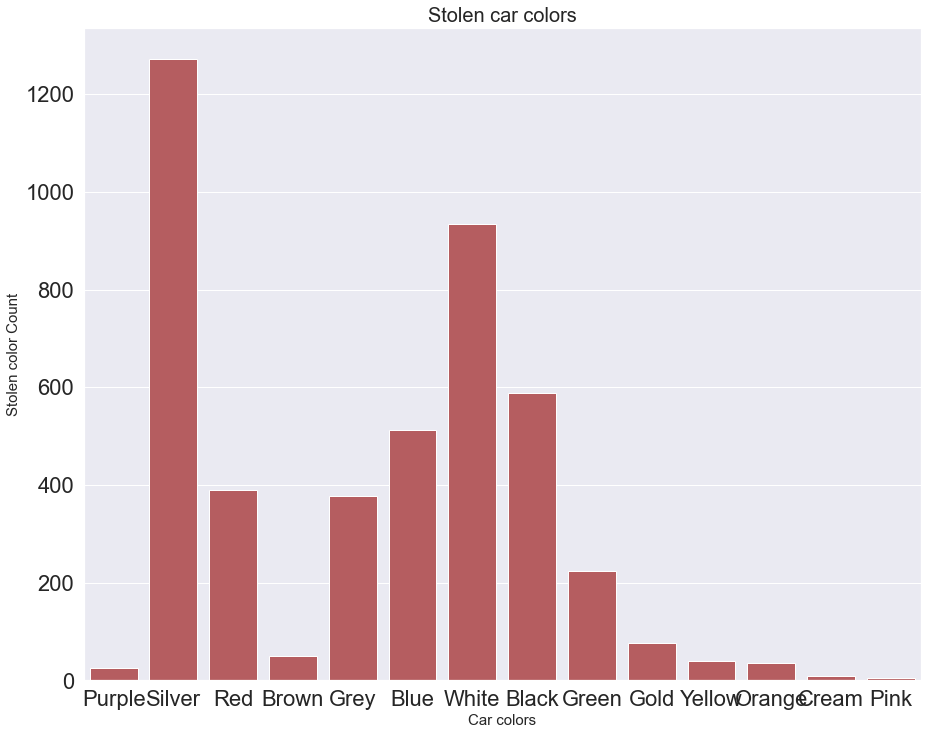

In [61]:
ax = plt.subplots(figsize=(15, 12))
sns.set(font_scale=1)
sns.countplot(x='Color', data=df, color="r")
plt.ylabel('Stolen color Count', fontsize=15);
plt.xlabel('Car colors', fontsize=15);
plt.title('Stolen car colors', fontsize=20)

Text(0.5, 1.0, 'CAR THEFT AREAS')

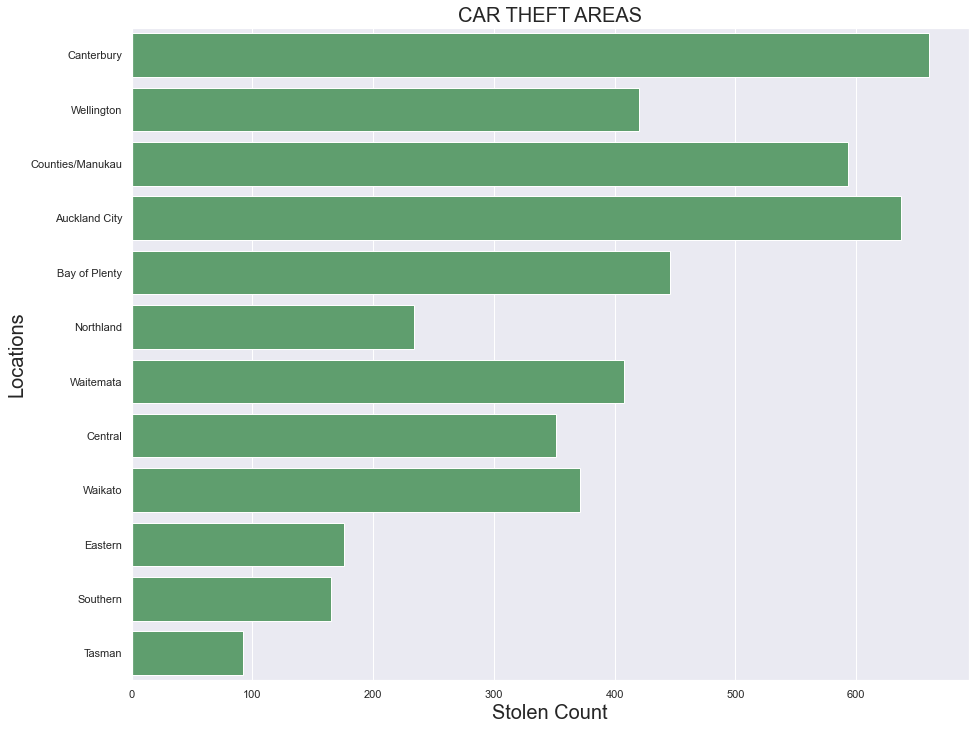

In [62]:
ax = plt.subplots(figsize=(15, 12))
sns.set(font_scale=2)
sns.countplot(y='Location', data=df, color="g")
plt.xlabel('Stolen Count', fontsize=20);
plt.ylabel('Locations', fontsize=20);
plt.title('CAR THEFT AREAS', fontsize=20)

In [63]:
print(df["Location"].value_counts())

Canterbury          660
Auckland City       637
Counties/Manukau    593
Bay of Plenty       446
Wellington          420
Waitemata           408
Waikato             371
Central             351
Northland           234
Eastern             176
Southern            165
Tasman               92
Name: Location, dtype: int64


In [64]:
df.Location.value_counts()

Canterbury          660
Auckland City       637
Counties/Manukau    593
Bay of Plenty       446
Wellington          420
Waitemata           408
Waikato             371
Central             351
Northland           234
Eastern             176
Southern            165
Tasman               92
Name: Location, dtype: int64

In [65]:
"""
Canterbury
Northland
Auckland city - Auckland
Counties/Manukau - Auckland
Bay of Plenty
Waitemata - Auckland
Waikato
Southern - Southland
Eastern - Hawke's Bay
Tasman
Wellington
Central - Wellington
"""
"""for row in df:
    if(():
        row["Location"] = "Auckland"
    elif((row["Location"] == "Southern")):
        row["Location"] = "Southland"
    elif((row["Location"] == "Eastern")):
        row["Location"] = "Hawke's Bay"
    elif((row["Location"] == "Central") | (row["Location"] == "Canterbury")):
        row["Location"] = "Canterbury, New Zealand"
    else:
        continue
df  

df1 = df[(df["Location"] == "Auckland City") | (df["Location"] == "Counties/Manukau") | (df["Location"] == "Waitemata")]
df1["Locations"] = "Auckland, New Zealand"
df1 = df1.drop("Location", axis = 1)


df2 = df[(df["Location"] == "Southern")]
df2["Locations"] = "Southland, New Zealand"
df2 = df2.drop("Location", axis = 1)

df3 = df[df["Location"] == "Eastern"]
df3["Locations"] = "Hawke's Bay, New Zealand"
df3 = df3.drop("Location", axis=1)

df4 = df[(df["Location"] == "Central") | (df["Location"] == "Canterbury")]

"""


df1 = pd.DataFrame()
df["Location"] = df["Location"].replace(["Auckland City"], "Auckland, New Zealand")

df["Location"] = df["Location"].replace(["Counties/Manukau"], "Auckland, New Zealand")
df["Location"] = df["Location"].replace(["Waitemata"], "Auckland, New Zealand")
df["Location"] = df["Location"].replace(["Southern"], "Southland, New Zealand")
df["Location"] = df["Location"].replace(["Eastern"], "Hawke's Bay, New Zealand")
df["Location"] = df["Location"].replace(["Central", "Canterbury"], "Canterbury, New Zealand")
df["Location"] = df["Location"].replace(["Tasman"], "Tasman, New Zealand")

df1["Location"] = df.Location.unique()
df1





,Location
0,"Canterbury, New Zealand"
1,Wellington
2,"Auckland, New Zealand"
3,Bay of Plenty
4,Northland
5,Waikato
6,"Hawke's Bay, New Zealand"
7,"Southland, New Zealand"
8,"Tasman, New Zealand"


In [66]:
location_list = gpd.tools.geocode(df1.Location)
location_list

,geometry,address
0,POINT (171.80984 -43.49418),"Canterbury, New Zealand / Aotearoa"
1,POINT (174.77721 -41.28880),"Wellington, 6011, Wellington, New Zealand / Ao..."
2,POINT (174.76318 -36.85209),"Auckland, 1010, Waitematā, Auckland, New Zeala..."
3,POINT (176.93022 -37.50005),"Bay of Plenty, 3119, New Zealand / Aotearoa"
4,POINT (173.94701 -35.37551),"Northland, New Zealand / Aotearoa"
5,POINT (175.20103 -37.77923),"Waikato, New Zealand / Aotearoa"
6,POINT (176.76115 -39.52565),"Hawke's Bay, New Zealand / Aotearoa"
7,POINT (167.60685 -45.92543),"Southland, New Zealand / Aotearoa"
8,POINT (172.89453 -41.30222),"Tasman, New Zealand / Aotearoa"


<AxesSubplot:>

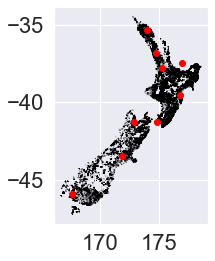

In [67]:
fig, ax = plt.subplots()
gdf.to_crs("EPSG:4326").plot(ax=ax, color="white", edgecolor="black")
location_list.plot(ax=ax, color="red")



Text(0.5, 0, 'Theft count')

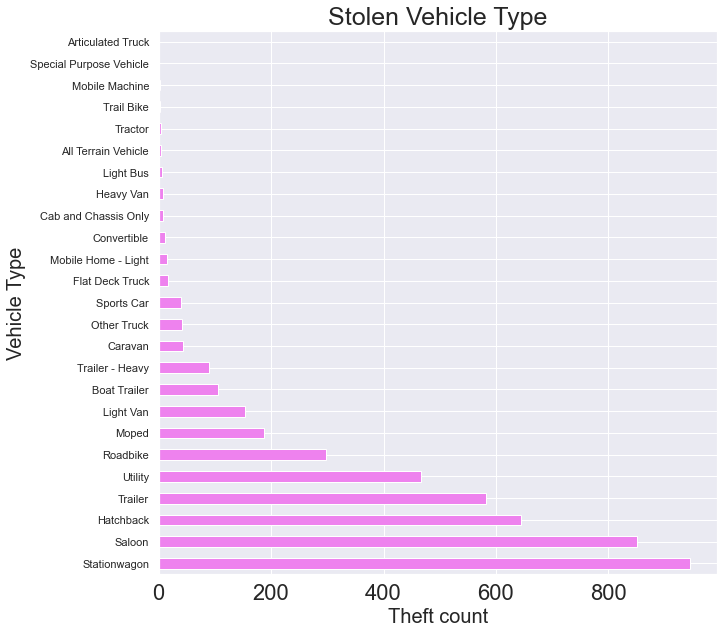

In [68]:
df['VehicleType'].value_counts().plot(kind='barh',figsize=(10, 10), color='Violet')
plt.yticks(fontsize=11)
plt.title("Stolen Vehicle Type", fontsize= 25)
plt.ylabel("Vehicle Type",fontsize= 20)
plt.xlabel("Theft count",fontsize= 20)

<AxesSubplot:ylabel='VehicleModel'>

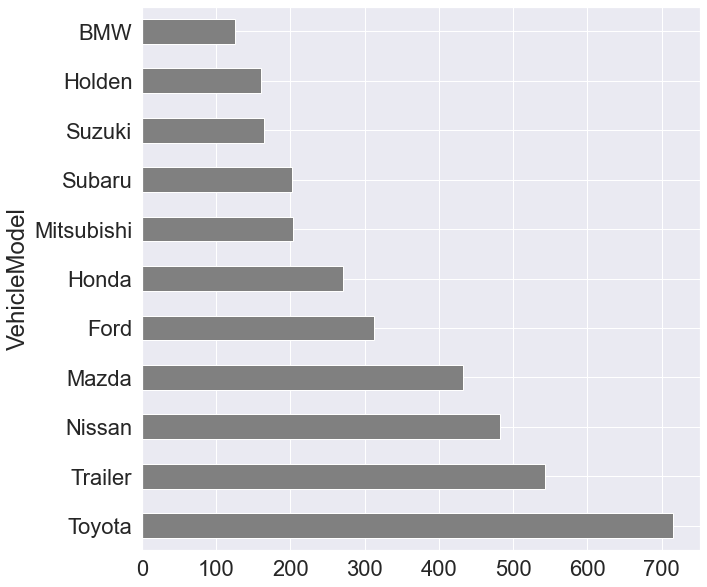

In [69]:
df.value_counts('VehicleModel').head(11).plot(kind='barh',figsize=(10, 10), color='grey')


In [87]:
n = 5000
df_car_census = pd.read_csv("Motor_Vehicle_Register.csv", skiprows=lambda i: i % n != 0)


<AxesSubplot:ylabel='MAKE'>

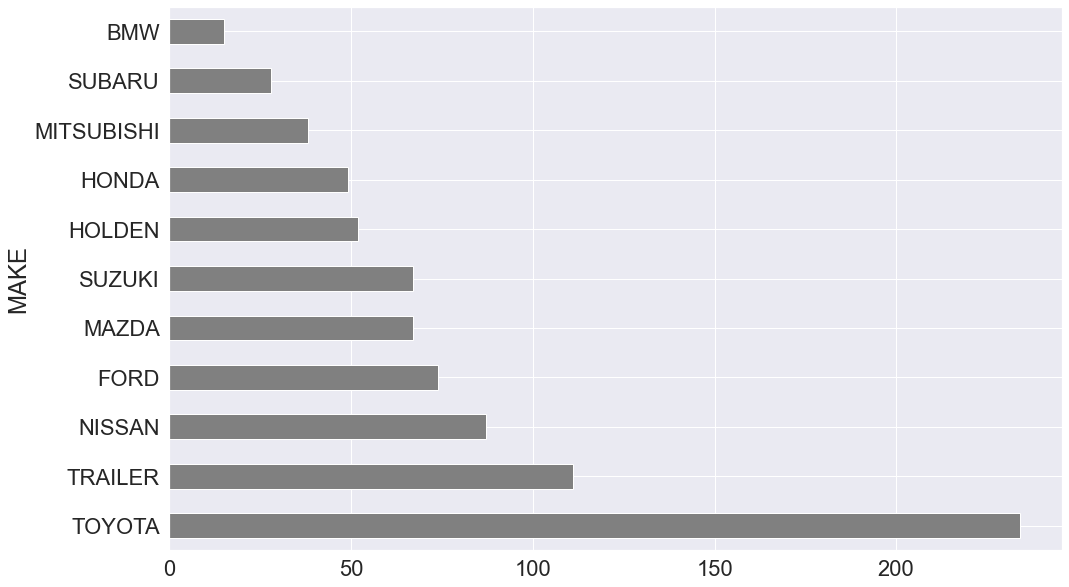

In [150]:
df2 = df_car_census[(df_car_census["MAKE"] == "BMW") | (df_car_census["MAKE"] == "HOLDEN") | (df_car_census["MAKE"] == "SUZUKI") | (df_car_census["MAKE"] == "SUBARU") | (df_car_census["MAKE"] == "MITSUBISHI") | (df_car_census["MAKE"] == "HONDA") | (df_car_census["MAKE"] == "FORD") | (df_car_census["MAKE"] == "MAZDA") | (df_car_census["MAKE"] == "NISSAN") | (df_car_census["MAKE"] == "TRAILER") | (df_car_census["MAKE"] == "TOYOTA")]
df2["MAKE"]
names_list = df2["MAKE"].unique()

df_stolen_census = df[(df["VehicleModel"] == "BMW") | (df["VehicleModel"] == "Holden") | (df["VehicleModel"] == "Suzuki") | (df["VehicleModel"] == "Subaru") | (df["VehicleModel"] == "Mitsubishi") | (df["VehicleModel"] == "Honda") | (df["VehicleModel"] == "Ford") | (df["VehicleModel"] == "Mazda") | (df["VehicleModel"] == "Nissan") | (df["VehicleModel"] == "Trailer") | (df["VehicleModel"] == "Toyota")]

names_list_stolen = df_stolen_census["VehicleModel"].unique()
#print(names_list_stolen)
#print(names_list)
df2.value_counts('MAKE').plot(kind='barh',figsize=(16, 10), color='grey')
# out of a sample size of 1000

In [108]:
df_stolen_census

,Color,VehicleModel,VehicleDesc,ModelYear,VehicleType,DateStolen,Location
2779,Silver,Nissan,NAVARA,2014,Utility,2022-12-03,Wellington
3967,Red,Nissan,NAVARA,2021,Utility,2022-12-03,"Auckland, New Zealand"
2645,Purple,Mazda,DEMIO,2005,Stationwagon,2022-12-03,"Auckland, New Zealand"
4245,Brown,Toyota,COROLLA,1996,Hatchback,2022-12-03,Bay of Plenty
3301,Grey,Subaru,FORESTER,2007,Stationwagon,2022-12-03,Northland
...,...,...,...,...,...,...,...
3109,White,Toyota,CROWN,2005,Saloon,2021-01-11,Bay of Plenty
1865,Silver,Ford,RANGER,2007,Utility,2021-01-11,Bay of Plenty
2413,White,Mazda,AXELA,2005,Saloon,2021-01-11,"Auckland, New Zealand"
762,Green,Honda,CRV,2001,Light Van,2021-01-11,Wellington


In [111]:
def ratio_stolen(name):
    stolen_count = len(df[df["VehicleModel"] == name].value_counts().index.tolist())
    
    print(name, (stolen_count/3612))

In [112]:
for name in names_list_stolen:
    ratio_stolen(name)
    
    

Nissan 0.13344407530454042
Mazda 0.11877076411960133
Toyota 0.1979512735326689
Subaru 0.05564784053156146
Ford 0.08610188261351052
Mitsubishi 0.0562015503875969
Honda 0.0739202657807309
Trailer 0.14839424141749724
Holden 0.044296788482835
BMW 0.03433001107419712
Suzuki 0.044573643410852716


In [148]:
n = 5583836/5000
def ratio_all(name):
    #print(name)
    df_temp = df2[df2["MAKE"]==name]
    all_count = len(df_temp)
    #all_count = len(df2[df2["MAKE"] == name].value_counts())
    #print(all_count)
    print(name, (all_count/(n)))

In [149]:
for name in names_list:
    ratio_all(name)

TOYOTA 0.20953337454753326
BMW 0.013431626573559825
TRAILER 0.09939403664434271
SUZUKI 0.05999459869523389
FORD 0.06626269109622847
HOLDEN 0.04656297212167406
MITSUBISHI 0.03402678731968489
HONDA 0.04387664680696209
NISSAN 0.07790343412664699
MAZDA 0.05999459869523389
SUBARU 0.02507236960397834


<AxesSubplot:ylabel='VehicleModel'>

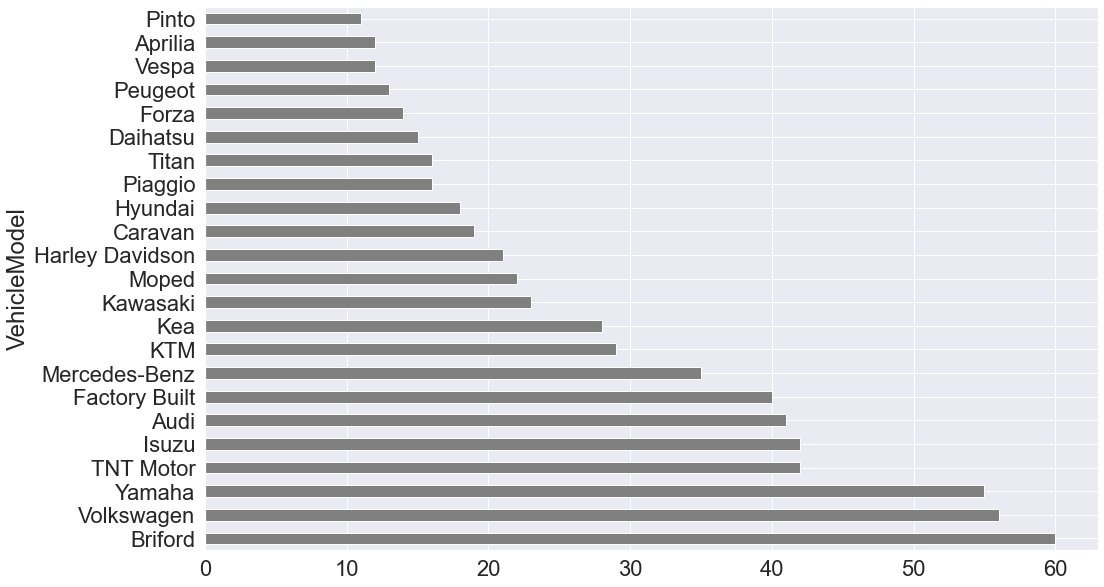

In [110]:
df.value_counts('VehicleModel').iloc[12:35].plot(kind='barh',figsize=(16, 10), color='grey')


In [73]:
df1 = df.loc[df["DateStolen"].between("2021-10-07","2021-12-31")]


In [74]:
df1['Date'] = df1['DateStolen'].dt.date
df1

<ipython-input-74-3a51b4cde91a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Color,VehicleModel,VehicleDesc,ModelYear,VehicleType,DateStolen,Location,Date
4464,Silver,Trailer,TRAILPRO,2014,Trailer,2021-12-31,"Southland, New Zealand",2021-12-31
165,Silver,Briford,TRAILER,2015,Trailer - Heavy,2021-12-31,Waikato,2021-12-31
4279,Silver,Trailer,LOCAL,2013,Trailer,2021-12-31,"Southland, New Zealand",2021-12-31
480,Silver,Trailer,TUI,2017,Trailer,2021-12-31,"Canterbury, New Zealand",2021-12-31
2909,Red,Mazda,RX-8,2006,Saloon,2021-12-31,"Canterbury, New Zealand",2021-12-31
...,...,...,...,...,...,...,...,...
3112,White,Nissan,VANETTE,2008,Light Van,2021-10-10,Bay of Plenty,2021-10-10
1191,Red,Ford,MONDEO,2004,Stationwagon,2021-10-10,"Auckland, New Zealand",2021-10-10
16,Silver,Trailer,BSTB85B,2021,Trailer,2021-10-10,"Auckland, New Zealand",2021-10-10
142,Silver,Trailer,TASMAN8X5TB,2019,Trailer,2021-10-10,"Tasman, New Zealand",2021-10-10


Text(0.5, 1.0, '2021-CAR THEFT MONTHS')

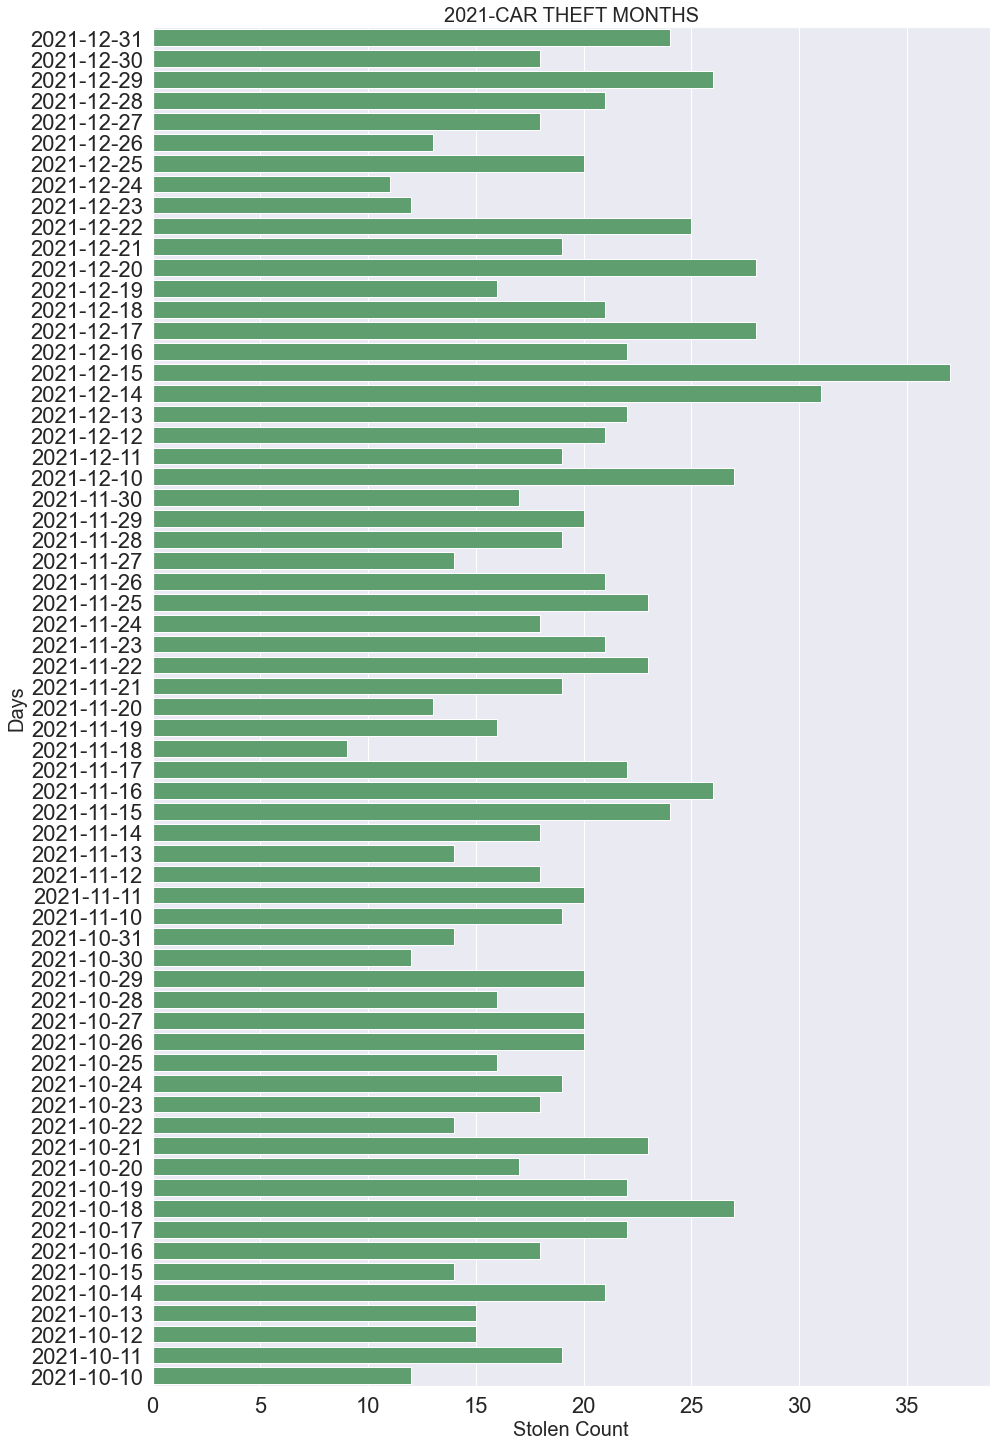

In [75]:
ax = plt.subplots(figsize=(15, 25))
sns.set(font_scale=2)
sns.countplot(y='Date', data=df1, color="g")
plt.xlabel('Stolen Count', fontsize=20);
plt.ylabel('Days', fontsize=20);
plt.title('2021-CAR THEFT MONTHS', fontsize=20)

In [76]:
df2 = df.loc[df["DateStolen"].between("2022-01-01", "2022-04-01")]


In [77]:
df2['Date'] = df2['DateStolen'].dt.date
print(df2)

       Color VehicleModel     VehicleDesc  ModelYear      VehicleType  \
311   Silver      Trailer      ASD JETSKI       2020     Boat Trailer   
475    White        Jayco       STARCRAFT       2017  Trailer - Heavy   
1607    Grey        Honda             CRV       1997     Stationwagon   
4381    Blue       Toyota         CALDINA       1996     Stationwagon   
378      Red        Honda             CBR       1999         Roadbike   
...      ...          ...             ...        ...              ...   
3146  Silver       Toyota            RAV4       2005     Stationwagon   
2514  Silver   Mitsubishi          MIRAGE       1996           Saloon   
389   Silver      Trailer  JOB MATE 7 X 4       2020          Trailer   
956      Red    TNT Motor            ROMA       2016            Moped   
4094  Silver    Homebuilt         TRAILER       2011          Trailer   

     DateStolen                  Location        Date  
311  2022-04-01     Auckland, New Zealand  2022-04-01  
475  2022-0

<ipython-input-77-2e4bceb97043>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Text(0.5, 1.0, '2022-CAR THEFT MONTHS')

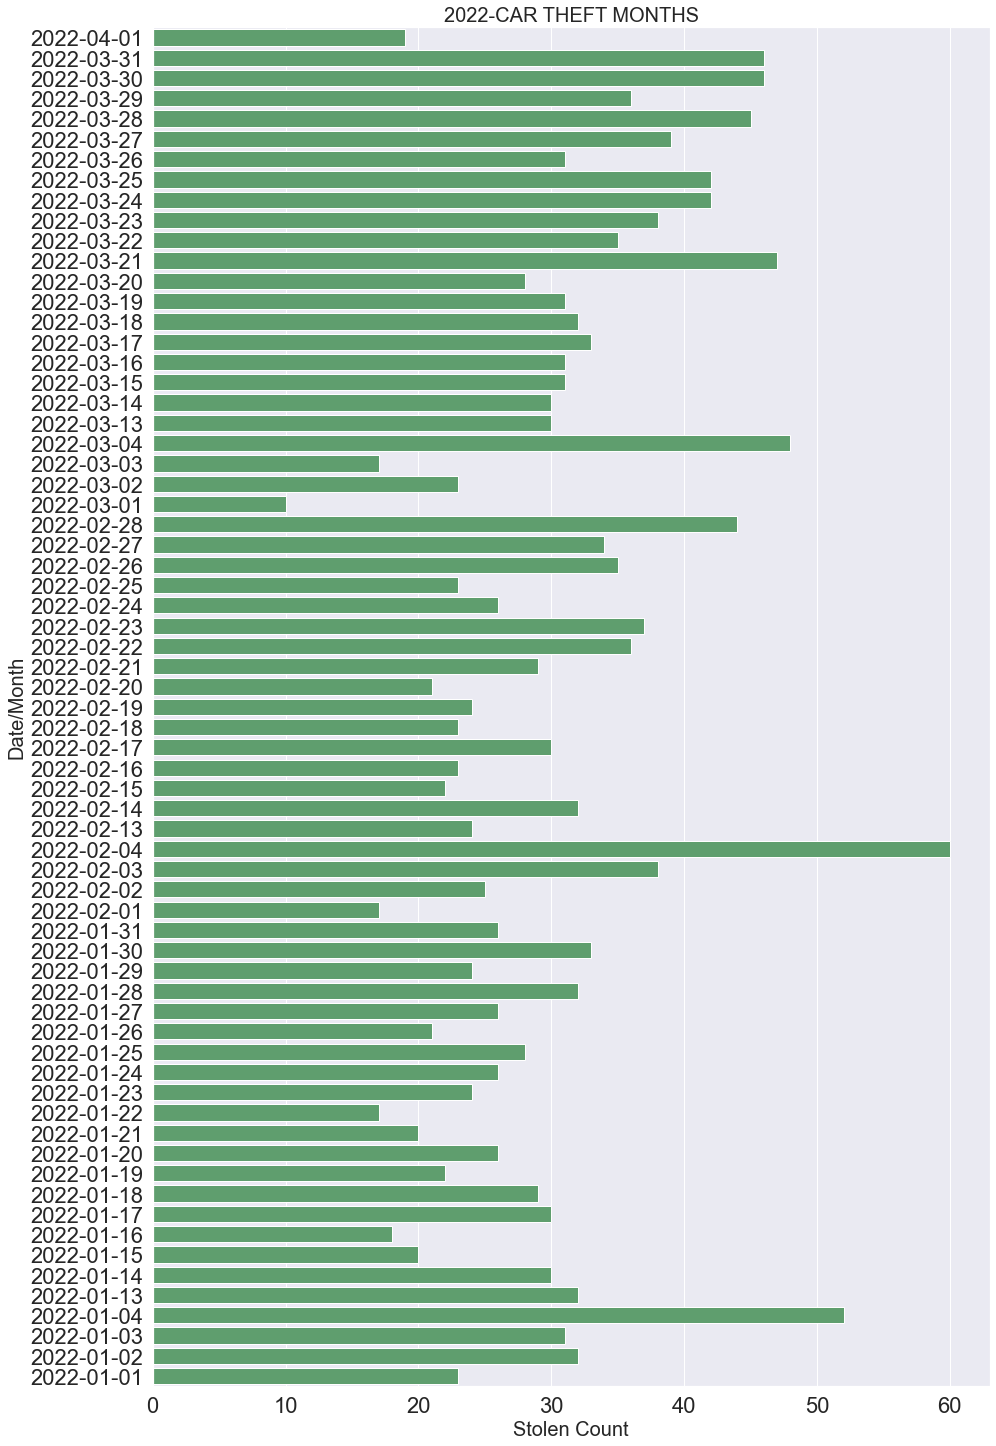

In [78]:
ax = plt.subplots(figsize=(15, 25))
sns.set(font_scale=2)
sns.countplot(y='Date', data=df2, color="g")
plt.xlabel('Stolen Count', fontsize=20);
plt.ylabel('Date/Month', fontsize=20);
plt.title('2022-CAR THEFT MONTHS', fontsize=20)